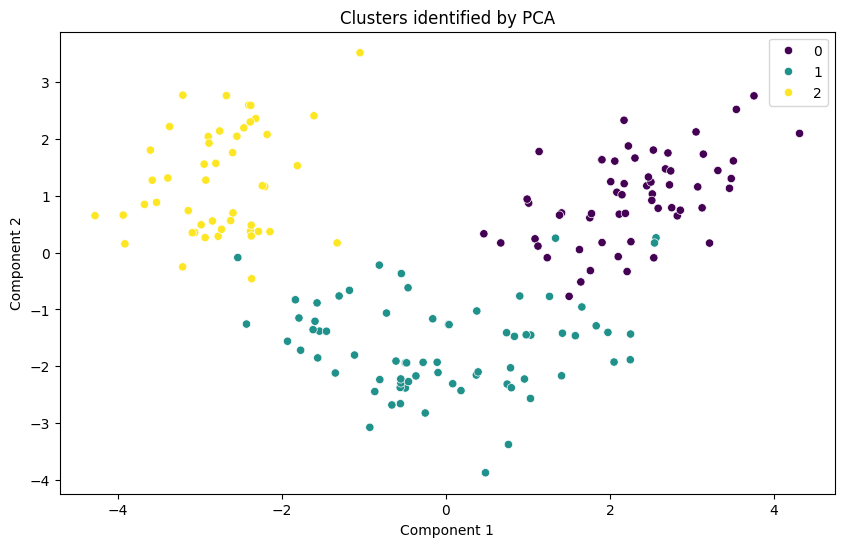

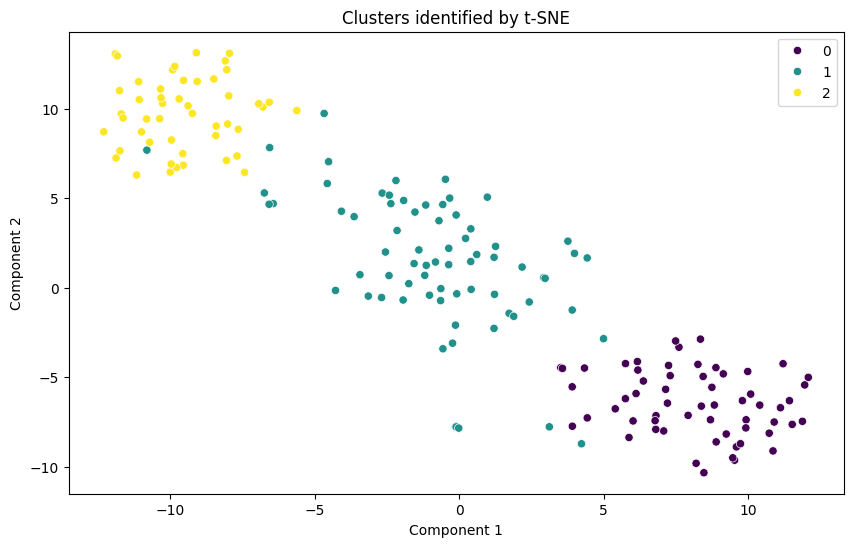

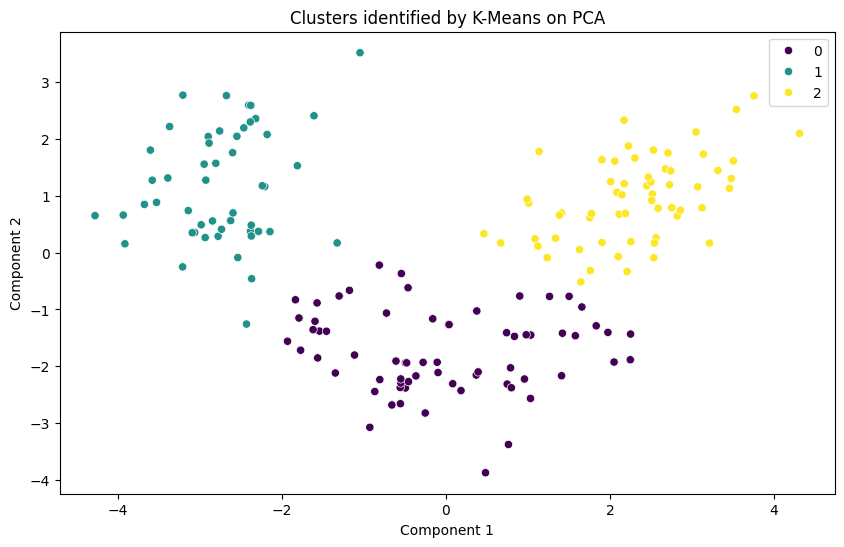

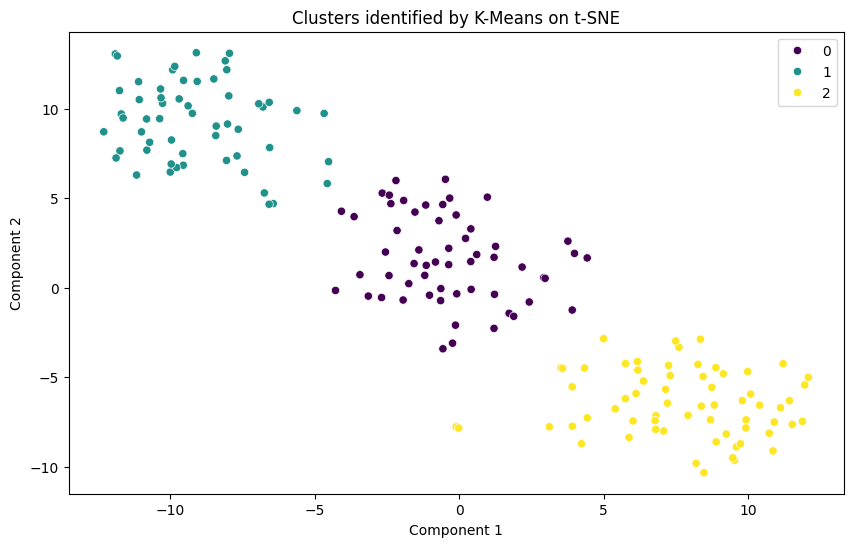

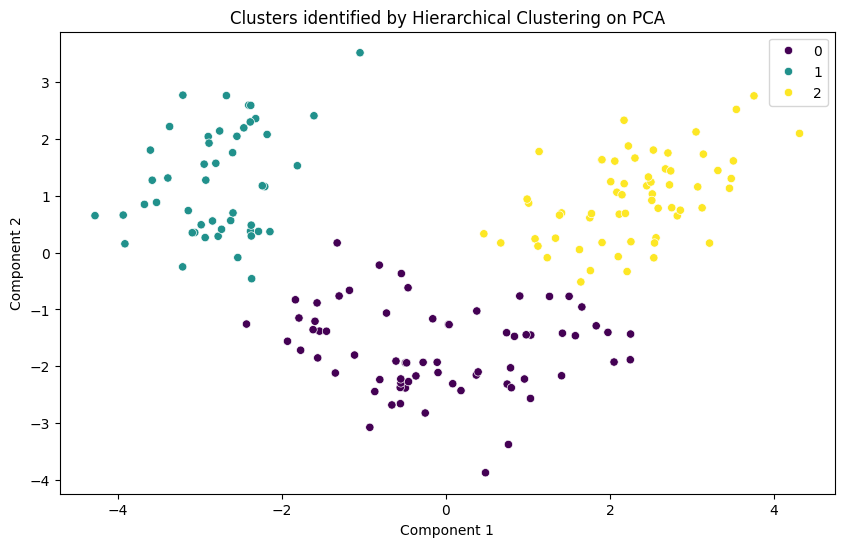

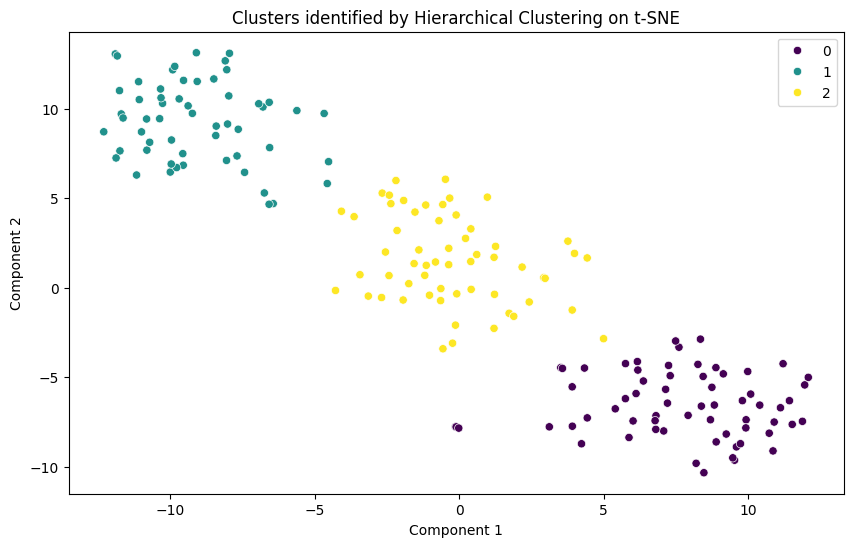

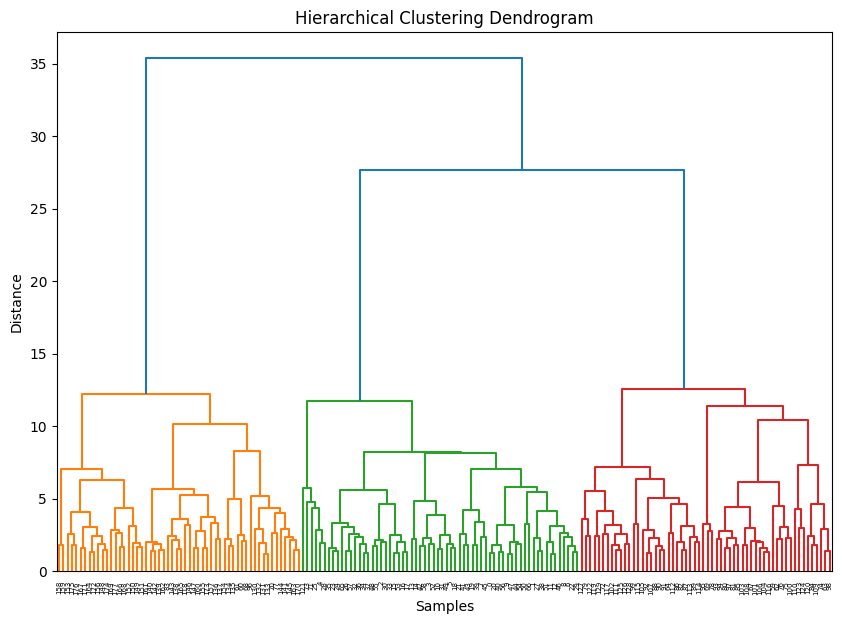

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Step 1: Load and preprocess the dataset
def load_and_preprocess_data():
    wine = load_wine()
    features = wine.data
    target = wine.target
    feature_names = wine.feature_names

    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)

    return features_standardized, target, feature_names, wine


# Step 2: Principal Component Analysis (PCA)
def perform_pca(features):
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)
    return features_pca


# Step 3: t-SNE
def perform_tsne(features):
    tsne = TSNE(n_components=2, random_state=42)
    features_tsne = tsne.fit_transform(features)
    return features_tsne


# Step 4: K-Means Clustering
def perform_kmeans(features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    return clusters


# Step 5: Hierarchical Clustering
def perform_hierarchical_clustering(features, n_clusters=3):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = hierarchical.fit_predict(features)
    return clusters


# Step 6: Visualization Functions
def plot_clusters(features, clusters, method_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=clusters, palette="viridis")
    plt.title(f"Clusters identified by {method_name}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


def plot_dendrogram(features):
    linked = linkage(features, "ward")
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


features_standardized, target, feature_names, wine = load_and_preprocess_data()

# PCA
features_pca = perform_pca(features_standardized)
plot_clusters(features_pca, target, "PCA")

# t-SNE
features_tsne = perform_tsne(features_standardized)
plot_clusters(features_tsne, target, "t-SNE")

# K-Means Clustering
kmeans_clusters_pca = perform_kmeans(features_pca)
plot_clusters(features_pca, kmeans_clusters_pca, "K-Means on PCA")

kmeans_clusters_tsne = perform_kmeans(features_tsne)
plot_clusters(features_tsne, kmeans_clusters_tsne, "K-Means on t-SNE")

# Hierarchical Clustering
hierarchical_clusters_pca = perform_hierarchical_clustering(features_pca)
plot_clusters(features_pca, hierarchical_clusters_pca, "Hierarchical Clustering on PCA")

hierarchical_clusters_tsne = perform_hierarchical_clustering(features_tsne)
plot_clusters(
    features_tsne, hierarchical_clusters_tsne, "Hierarchical Clustering on t-SNE"
)

plot_dendrogram(features_standardized)